In [1]:
import pandas as pd
df = pd.read_csv("../data/raw/creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [3]:
from sklearn.model_selection import train_test_split

_, X_test, _, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
import joblib

lr = joblib.load("../models/logistic_regression.pkl")
rf = joblib.load("../models/random_forest.pkl")
xgb = joblib.load("../models/xgboost.pkl")

In [6]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

In [7]:
from sklearn.metrics import classification_report

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

print("Random Forest")
print(classification_report(y_test, y_pred_rf))

print("XGBoost")
print(classification_report(y_test, y_pred_xgb))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.46      0.89      0.61        98

    accuracy                           1.00     56962
   macro avg       0.73      0.94      0.80     56962
weighted avg       1.00      1.0

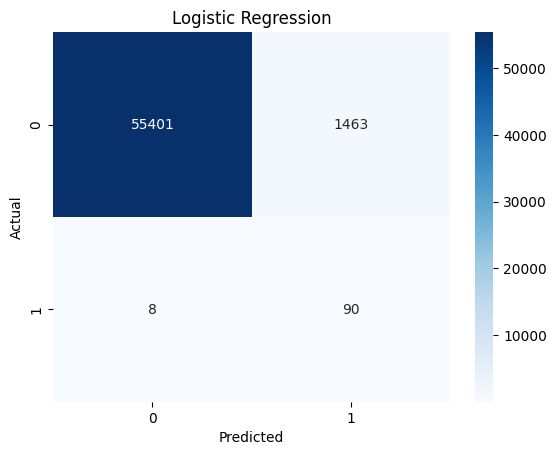

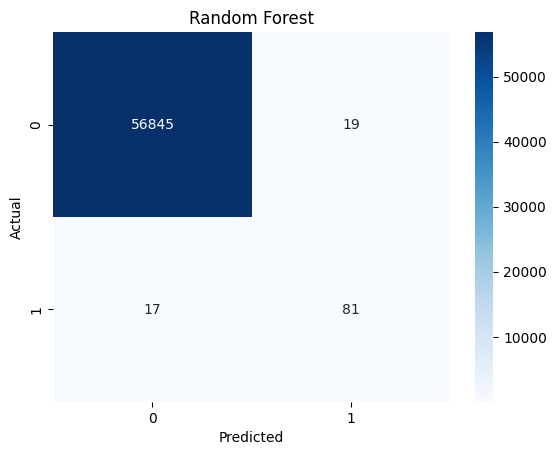

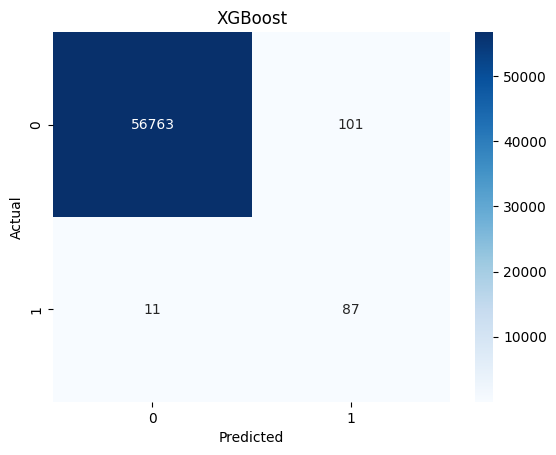

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(y_test, y_pred_lr, "Logistic Regression")
plot_cm(y_test, y_pred_rf, "Random Forest")
plot_cm(y_test, y_pred_xgb, "XGBoost")

In [9]:
from sklearn.metrics import roc_auc_score

print("LR ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))
print("RF ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("XGB ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

LR ROC-AUC: 0.969757057296751
RF ROC-AUC: 0.9734960177092785
XGB ROC-AUC: 0.9794660442961652


Random Forest was selected as the final model due to its strong balance between fraud detection capability and false alarm control.

Logistic Regression served as a baseline but produced excessive false positives. XGBoost achieved the highest recall and ROC-AUC but generated more false alerts. Random Forest provided the best balance between precision and recall, making it the most suitable model for real-world fraud detection.

In [10]:
import joblib

joblib.dump(rf, "../models/fraud_model.pkl")

['../models/fraud_model.pkl']

In this project, multiple machine learning models were trained to detect fraudulent credit card transactions on a highly imbalanced dataset. Logistic Regression was used as a baseline but produced a high number of false positives. XGBoost achieved the highest recall and ROC-AUC score, making it effective at identifying fraudulent transactions, but at the cost of increased false alerts.

Random Forest provided the best balance between precision and recall, achieving a strong F1-score for the fraud class while maintaining high overall stability. Therefore, Random Forest was selected as the final model for this project due to its practical suitability for real-world fraud detection systems.
    This project demonstrates the importance of handling class imbalance properly and selecting evaluation metrics beyond accuracy in real-world machine learning problems.